# Analyze VideoGame Sales table using KDB Q+ and embedPy
Created by Ricardo Acuna

### Import csv file into kdb table and cleaning table removing null values
Use q sql and parse q sql into functional q sql (k language) to remove null values [See reference](https://code.kx.com/q/basics/funsql/)  

In [4]:
vgsales:("ISSISSFFFFF";enlist",") 0: `:vgsales.csv //Import into kdb table
count select  from vgsales //Get all rows
count select  from vgsales where not null Rank, not null Name ,  not null Year,  not null Genre,  not null Publisher //q-sql Removing null values
count ?[`vgsales;((~:;(^:;`Rank));(~:;(^:;`Name));(~:;(^:;`Year));(~:;(^:;`Genre));(~:;(^:;`Publisher)));0b;()] //?[t;c;b;a] Removing null values
vgsales: ?[`vgsales;((~:;(^:;`Rank));(~:;(^:;`Name));(~:;(^:;`Year));(~:;(^:;`Genre));(~:;(^:;`Publisher)));0b;()] //Update tables without null values

### Get Sales by Region and Weight of each region (Just last 5 years of data)

In [117]:
5# `Year xdesc select sum NA_Sales,sum EU_Sales,sum JP_Sales,sum Other_Sales,sum Global_Sales by Year from vgsales //Global Sales 
5# `Year xdesc select W_NA_Sales:sum NA_Sales % sum Global_Sales,W_EU_Sales:sum EU_Sales % sum Global_Sales,W_JP_Sales:sum JP_Sales % sum Global_Sales,W_Other_Sales:sum Other_Sales % sum Global_Sales by Year from vgsales

Year| NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales
----| ---------------------------------------------------
2020| 0.27     0        0        0.02        0.29        
2017| 0        0        0.05     0           0.05        
2016| 22.66    26.76    13.7     7.75        70.93       
2015| 102.82   97.71    33.72    30.01       264.44      
2014| 131.97   125.65   39.46    40.02       337.05      


Year| W_NA_Sales W_EU_Sales W_JP_Sales W_Other_Sales
----| ----------------------------------------------
2020| 0.9310345  0          0          0.06896552   
2017| 0          0          1          0            
2016| 0.3194699  0.3772734  0.1931482  0.1092627    
2015| 0.3888217  0.3694978  0.1275147  0.1134851    
2014| 0.3915443  0.3727934  0.1170746  0.1187361    


### Set axis to python variables to use embedpy (Matplotlib)
"Set" is a important function to declare global variables, flat files etc. [See reference](https://code.kx.com/q/ref/get/)  
Use embedpy for data visualization using matplot library [See Reference](https://github.com/KxSystems/embedPy)

In [119]:
vgsales_sum:`Year xdesc select NA: sum NA_Sales,EU: sum EU_Sales,JP: sum JP_Sales,Other: sum Other_Sales,Total: sum Global_Sales by Year from vgsales //Global Sales 
Year:(exec Year from vgsales_sum) 
NA:(exec NA from vgsales_sum)
EU:(exec EU from vgsales_sum)
JP:(exec JP from vgsales_sum)
Other:(exec Other from vgsales_sum)

.p.set[`Year;Year]
.p.set[`NA;NA] 
.p.set[`EU;EU] 
.p.set[`JP;JP] 
.p.set[`Other;Other] //get a list for each axis and set up as python variable

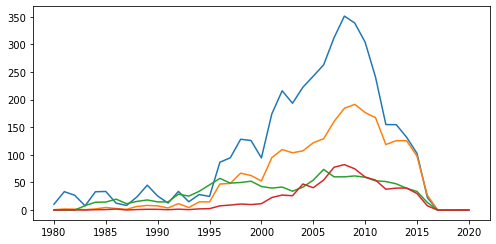

In [125]:
\l p.q
p)import matplotlib.pyplot as plt
p)x_coordinates = Year
p)y1_coordinates = NA
p)y2_coordinates = EU
p)y3_coordinates = JP
p)y4_coordinates = Other
p)plt.plot(x_coordinates, y1_coordinates) # plot first line
p)plt.plot(x_coordinates, y2_coordinates) # plot second line
p)plt.plot(x_coordinates, y3_coordinates) # plot third line
p)plt.plot(x_coordinates, y4_coordinates) # plot forth line

p)plt.show()

### Parse Q sql query to create dynamic functions
Parse tree represents an expression, not immediately evaluated [See reference.](https://code.kx.com/q/basics/parsetrees/)  
Functions in  kdb [See reference](https://code.kx.com/q4m3/6_Functions/)

In [126]:
?[`vgsales;enlist(like;`Platform;"PS2");0b;(enlist`EU_Sales)!enlist(sum;`EU_Sales)]
.fun.getsales:{[Plat;Reg] ?[`vgsales;enlist(like;`Platform;string Plat);0b;(enlist Reg)!enlist(sum; Reg)]} //Function to get sales by region and device
.fun.getsales[`PS2;`EU_Sales] //Get total sales of PS2 in EU

EU_Sales
--------
332.63  


EU_Sales
--------
332.63  


In [68]:
.fun.getsales:{[Cond;CondVal;Reg] ?[`vgsales;enlist(like;Cond;string CondVal);0b;(enlist Reg)!enlist(sum; Reg)]} //Improving function to select conditions
.fun.getsales[`Platform;`PS2;`EU_Sales] // Checking previous output
.fun.getsales[`Genre;`Sports;`EU_Sales] // Comparing 2 region sales with same genre
.fun.getsales[`Genre;`Sports;`JP_Sales] // A function that you can combine with multiple conditions

EU_Sales
--------
332.63  


EU_Sales
--------
371.34  


JP_Sales
--------
134.76  
